# Introduction

I made this kernel for Kaggle's 'NLP with Disaster Tweets' competition. In this kernel, given thousands of tweets, I tried to identify whether the tweet talks about a disaster or not.

# Contents

* Preliminary steps
    * Importing the necessary libraries
    * Converting the CSV file into a pandas dataframe
* Creating new columns
* Visualizing the data
* Encoding the features of the train data
* Defining the features and prediction target
* Creating the model
* Fitting the model
* Dealing with the test data
    * Encoding the features of the test data
* Prediction
* Ending Note

### Preliminary Steps

Importing the necessary libraries - 

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

tqdm.pandas()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Converting the CSV file into a pandas dataframe - 

In [2]:
os.listdir('../input/nlp-getting-started')

['train.csv', 'test.csv', 'sample_submission.csv']

In [3]:
train_data = pd.read_csv('../input/nlp-getting-started/train.csv')

A look at the train data - 

In [4]:
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


### Creating new columns

Creating 3 new columns - tweet_length, tweet_words and average_word_length

In [5]:
train_data["tweet_length"] = train_data["text"].progress_apply(len)
train_data["tweet_words"] = train_data["text"].progress_apply(lambda x: len(x.split()))
train_data["average_word_length"] = train_data["tweet_length"]/train_data["tweet_words"]

A look at the train data with the new columns - 

In [6]:
train_data.head(10)

,id,keyword,location,text,target,tweet_length,tweet_words,average_word_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,5.307692
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,5.428571
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,6.045455
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,8.125000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,5.500000
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,18,6.111111
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,14,6.785714
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,15,3.933333
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79,12,6.583333
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,10,5.200000


### Visualizing the data

Tweet Words Distributions - 

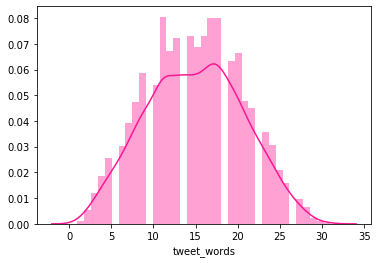

In [7]:
sns.distplot(train_data["tweet_words"], color="deeppink")
plt.show()

Tweet Length Distribution - 

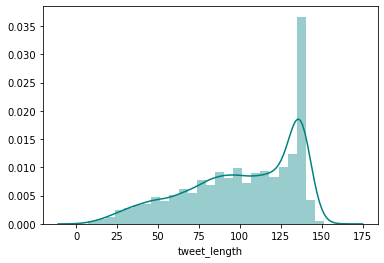

In [8]:
sns.distplot(train_data["tweet_length"], color="teal")
plt.show()

Average Word Length Distribution - 

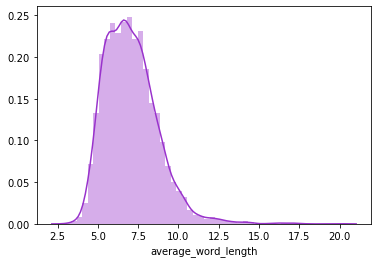

In [9]:
sns.distplot(train_data["average_word_length"], color="darkorchid")
plt.show()

Target vs. Tweet Words - 

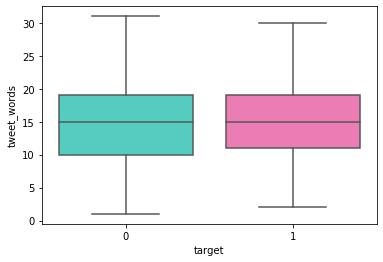

In [10]:
sns.boxplot(data=train_data, x="target", y="tweet_words", palette=["turquoise", "hotpink"])
plt.show()

Target vs. Tweet Length -

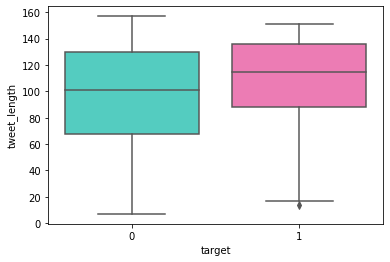

In [11]:
sns.boxplot(data=train_data, x="target", y="tweet_length", palette=["turquoise", "hotpink"])
plt.show()

Target vs. Average Tweet Length -

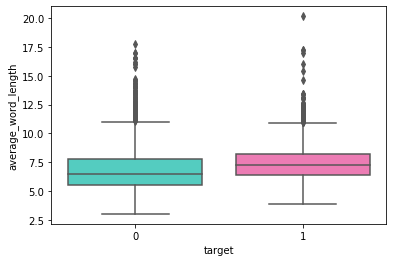

In [12]:
sns.boxplot(data=train_data, x="target", y="average_word_length", palette=["turquoise", "hotpink"])
plt.show()

### Encoding the features of the train data

Converting the tweets to vectors - 

In [13]:
count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train_data["text"]).todense()

### Defining the features and prediction target

In [14]:
X = train_vectors/train_vectors.max(axis=1)
y = train_data["target"].values.reshape((len(train_data), 1))

Splitting the training data into training data and validation data -

In [15]:
train_X, val_X, train_y, val_y = train_test_split(X, y)

### Creating the model

In [16]:
model = Sequential()
model.add(Dropout(0.85))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Providing the input size to the model -

In [17]:
model.build(input_shape=(None, 21637))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 21637)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21638     
Total params: 21,638
Trainable params: 21,638
Non-trainable params: 0
_________________________________________________________________


### Fitting the model

In [18]:
model.fit(x=train_X, y=train_y, validation_data=(val_X, val_y), epochs=100)

Train on 5709 samples, validate on 1904 samples
Epoch 1/100
5709/5709 [==============================] - 2s 342us/step - loss: 0.6815 - acc: 0.5887 - val_loss: 0.6695 - val_acc: 0.6324
Epoch 2/100
5709/5709 [==============================] - 2s 275us/step - loss: 0.6561 - acc: 0.6534 - val_loss: 0.6498 - val_acc: 0.6833
Epoch 3/100
5709/5709 [==============================] - 2s 274us/step - loss: 0.6342 - acc: 0.6823 - val_loss: 0.6345 - val_acc: 0.7059
Epoch 4/100
5709/5709 [==============================] - 2s 281us/step - loss: 0.6180 - acc: 0.6884 - val_loss: 0.6232 - val_acc: 0.7111
Epoch 5/100
5709/5709 [==============================] - 2s 273us/step - loss: 0.6096 - acc: 0.6903 - val_loss: 0.6141 - val_acc: 0.7169
Epoch 6/100
5709/5709 [==============================] - 2s 273us/step - loss: 0.5964 - acc: 0.7015 - val_loss: 0.6061 - val_acc: 0.7153
Epoch 7/100
5709/5709 [==============================] - 2s 266us/step - loss: 0.5875 - acc: 0.7099 - val_loss: 0.5987 - val_acc: 

### Dealing with the test data

Converting the CSV file into a pandas dataframe - 

In [19]:
test_data = pd.read_csv('../input/nlp-getting-started/test.csv')

### Encoding the features of the test data

Encoding the features of the test data and defining a new variable to hold the features - 

In [20]:
test_vectors = count_vectorizer.transform(test_data["text"]).todense()
X_test = test_vectors/test_vectors.max(axis=1)
X_test[np.isnan(X_test)] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


### Prediction

In [21]:
predictions = np.round(model.predict(X_test)).reshape((len(X_test)))

Since sample_submission.csv is of the format in which our submission is supposed to be made, I'm first importing it and converting it into a pandas dataframe -

In [22]:
sample_submission = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

Replacing the 'target' column in the dataframe with the values we got -

In [23]:
sample_submission["target"] = np.int32(predictions)

A final look at the dataframe with our predictions -

In [24]:
sample_submission.head(10)

,id,target
0,0,0
1,2,0
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


Converting the dataframe into a csv file without the index column -

In [25]:
sample_submission.to_csv('submission.csv', index=False)

### Ending Note

Through this project, I learnt about the conversion of text to vectors. I really enjoyed it, and look forward to learning more in the future. This being only my third ml model, I really appreciate feedback to help me improve both the accuracy and efficiency of my model :)